In [1]:
# So we desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is very computationally efficient to calculate. As you might guess from the chapter name, Gaussian distributions provide all of these features.

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

In [5]:
y = [2.2, 1.5, 2.3, 1.7, 1.3]
np.mean(y)

1.8

In [6]:
z = [1.8, 1.8, 1.8, 1.8, 1.8]
np.mean(y)

1.8

In [7]:
np.std(x)


0.14142135623730948

In [8]:
np.std(y)

0.3898717737923585

In [9]:
np.std(z)

0.0

In [10]:
np.var(x)

0.01999999999999999

In [11]:
np.var(y)

0.15199999999999997

In [12]:
np.var(z)

0.0

In [13]:
# gausians

In [17]:
from filterpy.stats import plot_gaussian_pdf

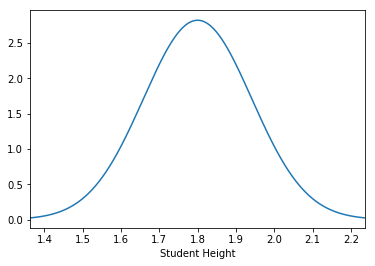

In [19]:
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, xlabel='Student Height')

# https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

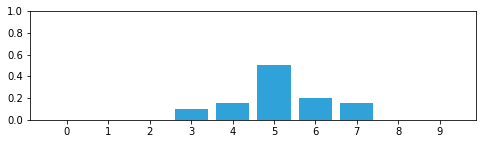

In [20]:
fig = plt.figure(figsize=(8,2))
data = [ 0.,0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
ax = plt.gca()
x = np.arange(len(data))
ax.bar(x, data, color='#30a2da',)
plt.ylim(0,1)
plt.xticks(np.asarray(x), x)


plt.show()

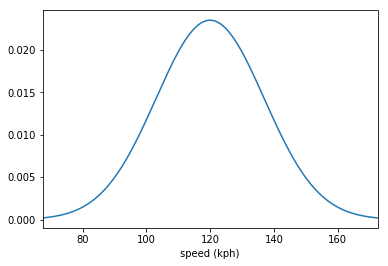

In [21]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed (kph)')


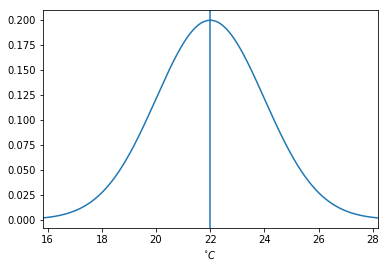

In [27]:
from filterpy.stats import gaussian, norm_cdf
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$')

In [28]:
# So how do you compute the probability, or area under the curve? Well, you integrate the equation for the Gaussian
print('Probability of value in range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Probability of value in range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Probability of value in range 21.5 to 22.5 is 19.74%
Probability of value in range 23.5 to 24.5 is 12.10%


In [29]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


In [30]:
# This leads to an important insight. If the variance is small the curve will be narrow. this is because the variance is a measure of how much the samples vary from the mean. To keep the area equal to 1, the curve must also be tall. On the other hand if the variance is large the curve will be wide, and thus it will also have to be short to make the area equal to 1.

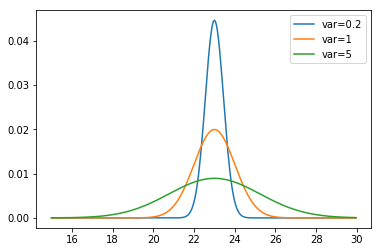

In [31]:
import numpy as np
import matplotlib.pyplot as plt
    
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2), label='var=0.2')
plt.plot(xs, gaussian(xs, 23, 1), label='var=1')
plt.plot(xs, gaussian(xs, 23, 5), label='var=5')
plt.legend();

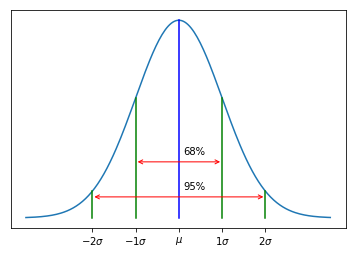

In [35]:
import math
import filterpy.stats as stats
xs = np.arange(10,30,0.1)
var = 8;
stddev = math.sqrt(var)
p2, = plt.plot (xs,[stats.gaussian(x, 20, var) for x in xs])
x = 20+stddev
# 1std vertical lines
y = stats.gaussian(x, 20, var)
plt.plot ([x,x], [0,y],'g')
plt.plot ([20-stddev, 20-stddev], [0,y], 'g')

#2std vertical lines
x = 20+2*stddev
y = stats.gaussian(x, 20, var)
plt.plot ([x,x], [0,y],'g')
plt.plot ([20-2*stddev, 20-2*stddev], [0,y], 'g')

y = stats.gaussian(20,20,var)
plt.plot ([20,20],[0,y],'b')

x = 20+stddev
ax = plt.gca()
ax.annotate('68%', xy=(20.3, 0.045))
ax.annotate('', xy=(20-stddev,0.04), xytext=(x,0.04),
                arrowprops=dict(arrowstyle="<->",
                                ec="r",
                                shrinkA=2, shrinkB=2))
ax.annotate('95%', xy=(20.3, 0.02))
ax.annotate('', xy=(20-2*stddev,0.015), xytext=(20+2*stddev,0.015),
                arrowprops=dict(arrowstyle="<->",
                                ec="r",
                                shrinkA=2, shrinkB=2))


ax.xaxis.set_ticks ([20-2*stddev, 20-stddev, 20, 20+stddev, 20+2*stddev])
ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
ax.yaxis.set_ticks([])
ax.grid(None, 'both', lw=0)

In [37]:
o, w, h = stats.covariance_ellipse(cov, 3)
    # rotate width and height to x,y axis
wx = abs(w*np.cos(o) + h*np.sin(o)) * 1.2
wy = abs(h*np.cos(o) - w*np.sin(o)) * 1.2


    # ensure axis are of the same size so everything is plotted with the same
    # scale
if wx > wy:
    w = wx
else:
    w = wy

minx = mean[0] - w
maxx = mean[0] + w
miny = mean[1] - w
maxy = mean[1] + w

xs = np.arange(minx, maxx, (maxx-minx)/40.)
ys = np.arange(miny, maxy, (maxy-miny)/40.)
xv, yv = np.meshgrid(xs, ys)

zs = np.array([100.* stats.multivariate_gaussian(np.array([x, y]), mean, cov) \
                   for x, y in zip(np.ravel(xv), np.ravel(yv))])
zv = zs.reshape(xv.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

    #ax = plt.gca(projection='3d')
ax.plot_surface(xv, yv, zv, rstride=1, cstride=1, cmap=cm.autumn)

ax.set_xlabel('X')
ax.set_ylabel('Y')

    # For unknown reasons this started failing in Jupyter notebook when
    # using `%matplotlib inline` magic. Still works fine in IPython or when
    # `%matplotlib notebook` magic is used.
x = mean[0]
zs = np.array([100.* stats.multivariate_gaussian(np.array([x, y]), mean, cov)
                   for _, y in zip(np.ravel(xv), np.ravel(yv))])
zv = zs.reshape(xv.shape)

y = mean[1]
zs = np.array([100.* stats.multivariate_gaussian(np.array([x, y]), mean, cov)
                   for x, _ in zip(np.ravel(xv), np.ravel(yv))])
zv = zs.reshape(xv.shape)

NameError: name 'cov' is not defined